In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`

In [2]:
using BifurcationKit, Setfield, LinearAlgebra, Plots, Parameters

In [3]:
function model_braint_rhythms(u, p)

    sE, sI, rE, rI, Y = u
    τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, gammaY, ythr, sEthr, kY = p

    g(Y) = 1 + gammaY / (1 + exp(-Y + ythr))
    HevY(sE) = 1/(1 + exp(-(sE - sEthr)/kY))

    dsEdt = (1/τsE) *(-sE + γE*rE*(1-sE)*g(Y) + s0E)
    dsIdt = (1/τsI) *(-sI + γI*rI*(1-sI) + s0I)

    drEdt = (1/ τrE) *(-rE + 1/(1 + exp(-kE*((IE + wEE*sE-wIE*sI) -  θE))))
    drIdt = (1/τrI) *(-rI + 1/(1 + exp(-kI*((II + wEI*sE-wII*sI) - θI))))
    
    dYdt = -Y / τY + βY * HevY(sE)
    
    return [dsEdt, dsIdt, drEdt, drIdt, dYdt]
end

model_braint_rhythms (generic function with 1 method)

In [4]:
τsE_ = 3.0; γE_ = 4.0; s0E_ = 0.15;
τsI_ = 10.0; γI_ = 8.0; s0I_ = 0.1;

τrE_ = 2.0; kE_ = 5.0; IE_ = 0.9; wEE_ = 3.5; wIE_ = 5.0; θE_ = 0.2;
τrI_ = 6.0; kI_ = 5.0; II_ = 0.0; wEI_ = 5.0; wII_ = 3.0; θI_ = 0.4;

τY_ = 0.01;  βY_ = 0.01;
ythr_ = 0.5; sEthr_ = 0.5; kY_ = 0.01
γY_ = 0.0

0.0

In [5]:
param =  (τsE = τsE_, γE = γE_, s0E = s0E_, τsI = τsI_, γI = γI_,
         s0I = s0I_, τrE = τrE_, kE = kE_, IE = IE_, wEE = wEE_, wIE = wIE_,
        θE = θE_, τrI = τrI_, kI = kI_, II = II_, wEI = wEI_, wII = wII_, θI = θI_, τY = τY_, βY = βY_, γY = γY_, ythr = ythr_, sEthr = sEthr_, kY = kY_)

(τsE = 3.0, γE = 4.0, s0E = 0.15, τsI = 10.0, γI = 8.0, s0I = 0.1, τrE = 2.0, kE = 5.0, IE = 0.9, wEE = 3.5, wIE = 5.0, θE = 0.2, τrI = 6.0, kI = 5.0, II = 0.0, wEI = 5.0, wII = 3.0, θI = 0.4, τY = 0.01, βY = 0.01, γY = 0.0, ythr = 0.5, sEthr = 0.5, kY = 0.01)

In [6]:
fp0 = [0.2522329213720189, 0.45021724371685473, 0.034179400342014936, 0.07962627958826166, 1.7362509463131359e-15];

In [7]:
prob_rate = BifurcationProblem(model_braint_rhythms, fp0, param, (@lens _.IE))

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: IE

In [8]:
opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 10.0, 0.0

(10.0, 0.0)

In [9]:
opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 0.0
  pMax: Float64 10.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [17]:
opt_new

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-6
  maxIter: Int64 3
  verbose: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}
  linesearch: Bool false
  α: Float64 1.0
  αmin: Float64 0.001


In [11]:
br = continuation(prob_rate, PALC(), opts_con)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 97
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter IE starts at 0.9, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1,       bp at IE ≈ +2.17512153 ∈ (+2.17512153, +2.17512500), |δp|=3e-06, [converged], δ = (-1,  0), step =  29, eigenelements in eig[ 30], ind_ev =   2
- #  2,       bp at IE ≈ +2.13875031 ∈ (+2.13825658, +2.13875031), |δp|=5e-04, [converged], δ = (-1,  0), step =  33, eigenelements in eig[ 34], ind_ev =   1
- #  3, endpoint at IE ≈ +10.00000000,                                                                     step =  96


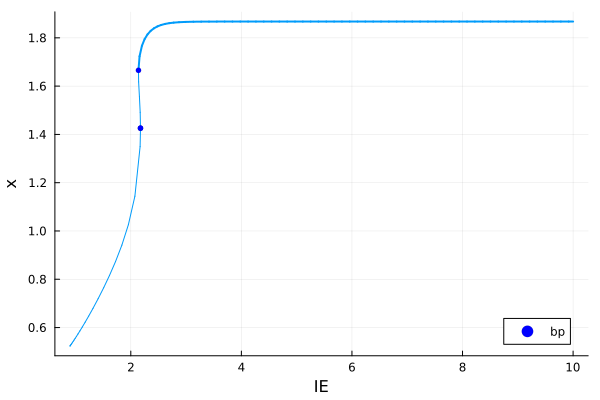

In [12]:
plot(br)

In [18]:
hp_codim2_1 = continuation(br, 1, (@lens _.γY),
	ContinuationPar(opts_con, pMin = -10.0, pMax = 10.0,
		ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━


──▶ convergence of initial guess = OK

──▶ parameter = 0.0, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 6.666666666666667e-6, initial step (bis)


Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter γY

 = 0.0000e+00 ⟶  1.4142e-03 [guess]


──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY

 = 0.0000e+00 ⟶  1.4142e-03
──> Computed 4 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.2355161435833093, 1.414213562373095, 0)
              ──> (0.23575128806286386, 1.4081106406195707, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter γY = 1.4142e-03 ⟶  3.1352e-03 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter γY = 1.4142e-03 ⟶  3.1352e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.23575128806286386, 1.4081106406195707, 0)
              ──> (0.2360373910104028, 1.4081106406195687, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.8333e-03


Parameter γY = 3.1352e-03 ⟶  5.7168e-03 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter γY = 3.1352e-03 ⟶  5.7168e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.2360373910104028, 1.4081106406195687, 0)
              ──> (0.23646521544623164, 1.4081106406195716, 0)
───────────────────────────────────────────────────────
Continuation Step 3 
Step size = 2.7500e-03
Parameter γY = 5.7168e-03 ⟶  9.5891e-03 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.7168e-03 ⟶  9.5894e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.23646521544623164, 1.4081106406195716, 0)
              ──> (0.23709984971205308, 1.408244655391673, 0)
───────────────────────────────────────────────────────
Continuation Step 4 
Step size = 3.3611e-03
Parameter γY = 9.5894e-03 ⟶  1.4323e-02 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter γY = 9.5894e-03 ⟶  1.

Parameter γY = 2.7309e-01 ⟶  3.3774e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.7309e-01 ⟶  3.3775e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.27213633510157204, 1.4103403593676063, 0)
              ──> (0.2788308277625575, 1.4106881347147406, 0)
───────────────────────────────────────────────────────
Continuation Step 17 
Step size = 5.6024e-02
Parameter γY = 3.3775e-01 ⟶  4.1679e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.3775e-01 ⟶  4.1681e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.2788308277625575, 1.4106881347147406, 0)
              ──> (0.2862636598649137, 1.4110533540990093, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 6.8474e-02
Parameter γY = 4.1681e-01 ⟶  5.1343e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 4.1681e-01 ⟶  5

Parameter γY = 2.1860e+00 ⟶  2.3274e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3555993730066, 1.413645418067483, 0)
              ──> (0.3574041266318711, 1.4136974496500279, 0)
───────────────────────────────────────────────────────
Continuation Step 32 
Step size = 1.0000e-01
Parameter γY = 2.3274e+00 ⟶  2.4688e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.3274e+00 ⟶  2.4688e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3574041266318711, 1.4136974496500279, 0)
              ──> (0.35894103833454305, 1.413742858520177, 0)
───────────────────────────────────────────────────────
Continuation Step 33 
Step size = 1.0000e-01
Parameter γY = 2.4688e+00 ⟶  2.6101e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.4688e+00 ⟶  2.6102e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event val

γY = 3.4585e+00 ⟶  3.5999e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.36407865663131067, 1.4139433255657476, 0)
              ──> (0.3642053371451806, 1.413961289071045, 0)
───────────────────────────────────────────────────────
Continuation Step 41 
Step size = 1.0000e-01
Parameter γY = 3.5999e+00 ⟶  3.7413e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.5999e+00 ⟶  3.7413e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3642053371451806, 1.413961289071045, 0)
              ──> (0.3642163836962247, 1.4139775483705797, 0)
───────────────────────────────────────────────────────
Continuation Step 42 
Step size = 1.0000e-01
Parameter γY = 3.7413e+00 ⟶  3.8827e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.7413e+00 ⟶  3.8827e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0

──> Event values: (0.3603607284792388, 1.414073186476001, 0)
              ──> (0.35959862865242304, 1.4140800829771467, 0)
───────────────────────────────────────────────────────
Continuation Step 52 
Step size = 1.0000e-01
Parameter γY = 5.1553e+00 ⟶  5.2967e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.1553e+00 ⟶  5.2967e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.35959862865242304, 1.4140800829771467, 0)
              ──> (0.35878609530125816, 1.414086485336019, 0)
───────────────────────────────────────────────────────
Continuation Step 53 
Step size = 1.0000e-01
Parameter γY = 5.2967e+00 ⟶  5.4381e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.2967e+00 ⟶  5.4381e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.35878609530125816, 1.414086485336019, 0)
              ──> (0.3579265927714714, 1.414092439164789, 0)
──

γY = 7.2765e+00 ⟶  7.4179e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.2765e+00 ⟶  7.4179e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.34368869594052964, 1.414142776112125, 0)
              ──> (0.3424297032236483, 1.414145269163602, 0)
───────────────────────────────────────────────────────
Continuation Step 68 
Step size = 1.0000e-01
Parameter γY = 7.4179e+00 ⟶  7.5593e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.4179e+00 ⟶  7.5593e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3424297032236483, 1.414145269163602, 0)
              ──> (0.3411553075995785, 1.4141476320055426, 0)
───────────────────────────────────────────────────────
Continuation Step 69 
Step size = 1.0000e-01
Parameter γY = 7.5593e+00 ⟶  7.7007e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.5593e+00 ⟶  7.7007e+00
──>

γY = 9.5392e+00 ⟶  9.6806e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant


──> Event values: (0.32228790164876603, 1.414170932248845, 0)
              ──> (0.32090067751077805, 1.4141720971240388, 0)
───────────────────────────────────────────────────────
Continuation Step 84 
Step size = 1.0000e-01
Parameter γY = 9.6806e+00 ⟶  9.8220e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.6806e+00 ⟶  9.8220e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.32090067751077805, 1.4141720971240388, 0)
              ──> (0.3195117552916496, 1.4141732144443, 0)
───────────────────────────────────────────────────────
Continuation Step 85 
Step size = 1.0000e-01
Parameter γY = 9.8220e+00 ⟶  9.9634e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.8220e+00 ⟶  9.9634e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3195117552916496, 1.4141732144443, 0)
              ──> (0.31812166465784925, 1.4141742867709624, 0)
─────



━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = -6.666666666666667e-6, initial step (bis)
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 0 
Step size = -1.0000e-03
Parameter γY = 0.0000e+00 ⟶  -1.4142e-03 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 0.0000e+00 ⟶  -1.4142e-03
──> Computed 4 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.2355161435833093, 1.414213562373095, 0)
              ──> (0.2352801260555554, 1.4080967956908015, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = -1.2222e-03
Parameter γY = -1.4142e-03 ⟶  -3.1352e-03 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter γY = -1.4142e-03 ⟶  -3.1352e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.2352801260555554, 1.4080967956908015, 0)
      

──> Event values: (0.2074384069536971, 1.405919551235521, 0)
              ──> (0.19927433669918876, 1.4051837679199475, 0)
───────────────────────────────────────────────────────
Continuation Step 15 
Step size = -3.0559e-02
Parameter γY = -1.8102e-01 ⟶  -2.2396e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -1.8102e-01 ⟶  -2.2393e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.19927433669918876, 1.4051837679199475, 0)
              ──> (0.18831477668327443, 1.404116468400718, 0)
───────────────────────────────────────────────────────
Continuation Step 16 
Step size = -3.7350e-02
Parameter γY = -2.2393e-01 ⟶  -2.7637e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -2.2393e-01 ⟶  -2.7631e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.18831477668327443, 1.404116468400718, 0)
              ──> (0.1731182023677894, 1.402462956386

──> Event detected before p = -0.5262177917231416
────> Entering [Event], indicator of 2 last events = ((1, 0), (2, 0))
────> [Bisection] initial ds = -0.006117873185142257
────> [Bisection] state.ds = 0.006117873185142257
──> eve (initial) (0.012580576197430122, 1.2165299624146624, 0) ──> (-0.020360365976702398, 0.7853493351278051, 0)

──> eigvals = 


1.9261557808017655e-8 + 0.0im
-0.011741552150491295 + 0.0im
-0.8548692826302273 + 0.0im
-1.5614606159765152 + 0.0im
-99.99999999999942 + 0.0im

────> eve (current) (-0.020360365976702398, 0.7853493351278051, 0) ──> (-0.020360365976702398, 0.7853493351278051, 0)
────> eigvals = 
1.9261557808017655e-8 + 0.0im
-0.011741552150491295 + 0.0im
-0.8548692826302273 + 0.0im
-1.5614606159765152 + 0.0im
-99.99999999999942 + 0.0im


────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (1, 0))
			ds = 0.0030589365925711284, p = -0.5262177917231416, #reverse = 0
────> event ∈ (-0.5262177917231416, -0.5208784507906137), precision = 5.339E-03
Predictor:  Secant

────> eve (current) (-0.020360365976702398, 0.7853493351278051, 0) ──> (-0.0025303551225994043, 0.45073012731843076, 0)
────> eigvals = 
6.783072859491986e-7 + 0.0im
-0.0014845914851915768 + 0.0im
-0.852812935312883 + 0.0im
-1.560814644905619 + 0.0im
-99.99999999999922 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (1, 0))
			ds = 0.0015294682962855642, p = -0.5247888273062796, #reverse = 0
────> event ∈ (-0.5247888273062796, -0.5208784507906137), precision = 3.910E-03
Predictor:  Secant

────> eve (current) (-0.0025303551225994043, 0.45073012731843076, 0) ──> (0.004652786828237753, 0.9316435812487106, 0)
────> eigvals = 
0.0027472849499937404 + 0.0im
5.424774006832502e-10 + 0.0im
-0.8519851196913398 + 0.0im
-1.5607570270915483 + 

────> Found at p = -0.5243460890945381 ∈ (-0.5243460890945381, -0.5239933456194495), 
			  δn = (1, 0), from p = -0.5262177917231416
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = false
──────> n_inversion >= nInversion = true
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ -0.5243460890945381 
───────────────────────────────────────────────────────
Continuation Step 23 
Step size = -6.1179e-03
Parameter γY = -5.2435e-01 ⟶  -5.2998e-01 [guess]
Newton correction failed
Halve ds = -0.0030589365925711284
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 23 
Step size = -3.0589e-03
Parameter γY = -5.2435e-01 ⟶  -5.2716e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter γY = -5.2435e-01 ⟶  -5.2621e-01
──> Computed 5 eigenvalues in 1 iterations, #u

Predictor:  Secant

────> eve (current) (-0.01933176812732777, -0.03733507482651055, 0) ──> (-0.019322873839527726, -0.03733507478971123, 0)
────> eigvals = 
-5.299684892468439e-7 + 0.0im
-0.011152667096337216 + 0.0im
-0.8547493899358911 + 0.0im
-1.5614029166351915 + 0.0im
-99.99999999999942 + 0.0im
────> 10 - [Bisection] (n1, n_current, n2) = ((1, 0), (0, 0), (0, 0))
			ds = 7.468106915456856e-7, p = -0.5262278598028007, #reverse = 0
────> event ∈ (-0.5262278598028007, -0.5262136725724015), precision = -1.419E-05
Predictor:  Secant

────> eve (current) (-0.019322873839527726, -0.03733507478971123, 0) ──> (-0.01931842876701127, -0.03733507486394313, 0)


────> eigvals = 
-5.565986353282502e-7 + 0.0im
-0.01115008486416837 + 0.0im
-0.8547488697295313 + 0.0im
-1.5614026689913885 + 0.0im
-99.99999999999942 + 0.0im
────> 11 - [Bisection] (n1, n_current, n2) = ((1, 0), (0, 0), (0, 0))
			ds = 3.734053457728428e-7, p = -0.5262278876850338, #reverse = 0
────> event ∈ (-0.5262278876850338, -0.5262136725724015), precision = -1.422E-05
Predictor:  Secant

────> eve (current) (-0.01931842876701127, -0.03733507486394313, 0) ──> (-0.019316206748168984, -0.0373350750116262, 0)
────> eigvals = 
-5.701321936638711e-7 + 0.0im
-0.011148793532237111 + 0.0im
-0.854748609629021 + 0.0im
-1.5614025451642033 + 0.0im
-99.99999999999942 + 0.0im
────> 12 - [Bisection] (n1, n_current, n2) = ((1, 0), (0, 0), (0, 0))
			ds = 1.867026728864214e-7, p = -0.5262279016261504, #reverse = 0
────> event ∈ (-0.5262279016261504, -0.5262136725724015), precision = -1.423E-05
Predictor:  Secant

────> eve (current) (-0.019316206748168984, -0.0373350750116262, 0) ──> (-0.01931509

────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ -0.5245629019964305 
───────────────────────────────────────────────────────
Continuation Step 29 
Step size = -4.0361e-04
Parameter γY = -5.2456e-01 ⟶  -5.2420e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2456e-01 ⟶  -5.2419e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.036676468956412696, -0.8950489064485497, 0)
              ──> (0.0385771115591188, -0.9313078325978345, 0)
───────────────────────────────────────────────────────
Continuation Step 30 
Step size = -4.2603e-04
Parameter γY = -5.2419e-01 ⟶  -5.2379e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2419e-01 ⟶  -5.2377e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.0385771115591188, -0.9313078325978345, 0)
              ──> (0.040500098365702876, -0.9835061057146185, 0)
───────────────────────────────

γY = -5.2280e-01 ⟶  -5.2224e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.04440195992553032, -1.070328174473433, 0)
              ──> (0.04637963032215827, -1.1061126533832748, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = -5.2889e-04
Parameter γY = -5.2224e-01 ⟶  -5.2166e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2224e-01 ⟶  -5.2164e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.04637963032215827, -1.1061126533832748, 0)
              ──> (0.04837524153645543, -1.1375923413349565, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = -5.5827e-04
Parameter γY = -5.2164e-01 ⟶  -5.2100e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2164e-01 ⟶  -5.2099e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 45 
Step size = -1.4882e-03
Parameter γY = -5.1098e-01 ⟶  -5.0901e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.1098e-01 ⟶  -5.0900e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.07243256664271089, -1.3180040993811455, 0)
              ──> (0.07575291072136779, -1.328140980046019, 0)
───────────────────────────────────────────────────────
Continuation Step 46 
Step size = -1.5709e-03
Parameter γY = -5.0900e-01 ⟶  -5.0691e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.0900e-01 ⟶  -5.0690e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.07575291072136779, -1.328140980046019, 0)
              ──> (0.07907063293855202, -1.3375061039656793, 0)
───────────────────────────────────────────────────────
Continuation Step 47 
Step size = -1.6582e-03
Paramete

──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -4.5674e-01 ⟶  -4.4987e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.13035953530988, -1.3923310318924031, 0)
              ──> (0.13533148388090283, -1.3941608250278015, 0)
───────────────────────────────────────────────────────
Continuation Step 60 
Step size = -5.1986e-03
Parameter γY = -4.4987e-01 ⟶  -4.4262e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -4.4987e-01 ⟶  -4.4261e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.13533148388090283, -1.3941608250278015, 0)
              ──> (0.14028594389901405, -1.3957448241619304, 0)
───────────────────────────────────────────────────────
Continuation Step 61 
Step size = -6.3539e-03
Parameter γY = -4.4261e-01 ⟶  -4.3375e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -4.4261e-01 ⟶  -4.3374e-01
──> Computed 5 eigenva

───────────────────────────────────────────────────────
Continuation Step 68 
Step size = -1.0742e-02
Parameter γY = -3.6892e-01 ⟶  -3.5385e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -3.6892e-01 ⟶  -3.5384e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.17899737888226586, -1.4030038629576995, 0)
              ──> (0.18512718287949673, -1.4036312669920696, 0)
───────────────────────────────────────────────────────
Continuation Step 69 
Step size = -1.1339e-02
Parameter γY = -3.5384e-01 ⟶  -3.3792e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -3.5384e-01 ⟶  -3.3792e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.18512718287949673, -1.4036312669920696, 0)
              ──> (0.19113260286063166, -1.4042211606523538, 0)
───────────────────────────────────────────────────────
Continuation Step 70 
Step size = -1.1968e-02
Parame


──> Event values: (0.24825226781531973, -1.407810002043513, 0)
              ──> (0.25250210232047604, -1.408021336636919, 0)
───────────────────────────────────────────────────────
Continuation Step 82 
Step size = -2.2899e-02
Parameter γY = -6.1138e-02 ⟶  -2.8896e-02 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -6.1138e-02 ⟶  -2.8891e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.25250210232047604, -1.408021336636919, 0)
              ──> (0.2565698316088511, -1.4082262471833804, 0)
───────────────────────────────────────────────────────
Continuation Step 83 
Step size = -2.4171e-02
Parameter γY = -2.8891e-02 ⟶  5.1473e-03 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -2.8891e-02 ⟶  5.1522e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2565698316088511, -1.4082262471833804, 0)
              ──> (0.26045016363275386, -1.4084261

───────────────────────────────────────────────────────
Continuation Step 98 
Step size = -5.4389e-02
Parameter γY = 7.3800e-01 ⟶  8.1475e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 7.3800e-01 ⟶  8.1476e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.29359343694951495, -1.4110160026241823, 0)
              ──> (0.2944741885125405, -1.4111870039985868, 0)
───────────────────────────────────────────────────────
Continuation Step 99 
Step size = -5.7410e-02
Parameter γY = 8.1476e-01 ⟶  8.9577e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 8.1476e-01 ⟶  8.9578e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2944741885125405, -1.4111870039985868, 0)
              ──> (0.2951797455272605, -1.4113546105411596, 0)
───────────────────────────────────────────────────────
Continuation Step 100 
Step size = -6.0600e-02
Parameter γY = 8

γY = 1.1669e+00 ⟶  1.2676e+00 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 1.1669e+00 ⟶  1.2676e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2963276342949513, -1.4118331626639842, 0)
              ──> (0.296418261347342, -1.4119833893043752, 0)
───────────────────────────────────────────────────────
Continuation Step 104 
Step size = -7.5231e-02
Parameter γY = 1.2676e+00 ⟶  1.3738e+00 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 1.2676e+00 ⟶  1.3738e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.296418261347342, -1.4119833893043752, 0)
              ──> (0.29637990398625375, -1.4121284434437746, 0)
───────────────────────────────────────────────────────
Continuation Step 105 
Step size = -7.9410e-02
Parameter γY = 1.3738e+00 ⟶  1.4860e+00 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 1.3738e+00 ⟶  1.486

Parameter γY = 3.2724e+00 ⟶  3.4138e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.2900709368565433, -1.4134444974157476, 0)
              ──> (0.28968229595443795, -1.4134902462828567, 0)
───────────────────────────────────────────────────────
Continuation Step 120 
Step size = -1.0000e-01
Parameter γY = 3.4138e+00 ⟶  3.5551e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.4138e+00 ⟶  3.5551e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.28968229595443795, -1.4134902462828567, 0)
              ──> (0.28932615886102736, -1.4135322694135914, 0)
───────────────────────────────────────────────────────
Continuation Step 121 
Step size = -1.0000e-01
Parameter γY = 3.5551e+00 ⟶  3.6965e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.5551e+00 ⟶  3.6965e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secan

γY = 3.8378e+00 ⟶  3.9792e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.8378e+00 ⟶  3.9792e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.2887125188703666, -1.4136066096637923, 0)
              ──> (0.28845487609838316, -1.413639554784619, 0)
───────────────────────────────────────────────────────
Continuation Step 124 
Step size = -1.0000e-01
Parameter γY = 3.9792e+00 ⟶  4.1206e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.9792e+00 ⟶  4.1206e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.28845487609838316, -1.413639554784619, 0)
              ──> (0.2882295817436658, -1.4136700416445676, 0)
───────────────────────────────────────────────────────
Continuation Step 125 
Step size = -1.0000e-01
Parameter γY = 4.1206e+00 ⟶  4.2619e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 4.1206e+00 ⟶  4.26


──> Event values: (0.2877983646721982, -1.4139077568404514, 0)
              ──> (0.28792758455097534, -1.413920450372916, 0)
───────────────────────────────────────────────────────
Continuation Step 138 
Step size = -1.0000e-01
Parameter γY = 5.9585e+00 ⟶  6.0999e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.9585e+00 ⟶  6.0999e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.28792758455097534, -1.413920450372916, 0)
              ──> (0.2880784965678338, -1.4139324171553924, 0)
───────────────────────────────────────────────────────
Continuation Step 139 
Step size = -1.0000e-01
Parameter γY = 6.0999e+00 ⟶  6.2413e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 6.0999e+00 ⟶  6.2413e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.2880784965678338, -1.4139324171553924, 0)
              ──> (0.2882503607877427, -1.413943710133


──> Event values: (0.2920938386438085, -1.414046529701376, 0)
              ──> (0.2924933366382878, -1.4140520147536502, 0)
───────────────────────────────────────────────────────
Continuation Step 154 
Step size = -1.0000e-01
Parameter γY = 8.2209e+00 ⟶  8.3623e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 8.2209e+00 ⟶  8.3623e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.2924933366382878, -1.4140520147536502, 0)
              ──> (0.2929052097077474, -1.4140572522715713, 0)
───────────────────────────────────────────────────────
Continuation Step 155 
Step size = -1.0000e-01
Parameter γY = 8.3623e+00 ⟶  8.5038e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 8.3623e+00 ⟶  8.5038e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.2929052097077474, -1.4140572522715713, 0)
              ──> (0.2933290358424148, -1.4140622564927

 ┌─ Curve type: FoldCont
 ├─ Number of points: 256
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter γY starts at 10.0, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at γY ≈ +10.00000000,                                                                     step =   0
- #  2,       bt at γY ≈ -0.52456290 ∈ (-0.52465322, -0.52456290), |δp|=9e-05, [converged], δ = ( 0,  0), step = 138, eigenelements in eig[139], ind_ev =   0
- #  3,     cusp at γY ≈ -0.52622791 ∈ (-0.52622791, -0.52621367), |δp|=1e-05, [    guess], δ = ( 0,  0), step = 142, eigenelements in eig[143], ind_ev =   0
- #  4,       bt at γY ≈ -0.52434609 ∈ (-0.52434609, -0.52399335), |δp|=4e-04, [converged], δ = ( 0,  0), step = 144, eigenelements in eig[145], ind_ev =   0
- #  5, endpoint at γY ≈ +10.00000000,                                                                     step = 255


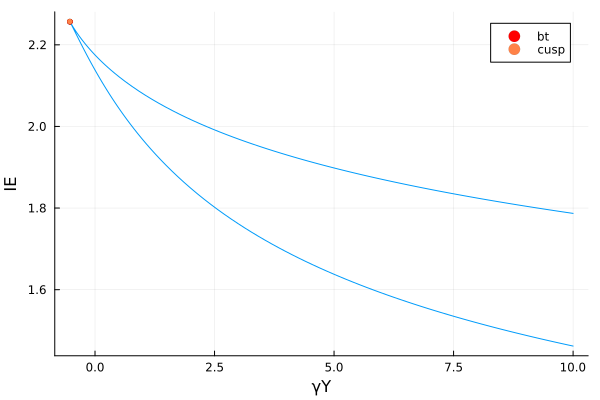

In [19]:
plot(hp_codim2_1)

In [21]:
hp_codim2_2 = continuation(br, 2, (@lens _.γY),
	ContinuationPar(opts_con, pMin = -10.0, pMax = 10.0,
		ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.0, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 6.666666666666667e-6, initial step (bis)
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter γY = 0.0000e+00 ⟶  1.4142e-03 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 0.0000e+00 ⟶  1.4142e-03
──> Computed 4 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2598882418599721, 1.414213562373095, 0)
              ──> (0.2600432880772251, 1.40849899715238, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter γY = 1.4142e-03 ⟶  3.1357e-03 [guess]
──> Step Converg

┌ Warning: The bifurcating eigenvalue is not that close to Re = 0. We found -0.02735653370725718 !≈ 0.  You can perhaps increase the argument `nev`.
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\NormalForms.jl:35


γY = 5.3684e-02 ⟶  6.9534e-02 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.3684e-02 ⟶  6.9535e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2653403919425437, 1.4087496905029524, 0)
              ──> (0.2667916838798551, 1.4088232467987436, 0)
───────────────────────────────────────────────────────
Continuation Step 10 
Step size = 1.3751e-02
Parameter γY = 6.9535e-02 ⟶  8.8907e-02 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 6.9535e-02 ⟶  8.8908e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2667916838798551, 1.4088232467987436, 0)
              ──> (0.2684768803988197, 1.4089107091796653, 0)
───────────────────────────────────────────────────────
Continuation Step 11 
Step size = 1.6806e-02
Parameter γY = 8.8908e-02 ⟶  1.1259e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 8.8908e-02 ⟶  1.1259e-01
─

Parameter γY

 = 1.3371e+00 ⟶  1.4783e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.29640704975110815, 1.4120537677958191, 0)
              ──> (0.2962376843346844, 1.4122405276753351, 0)
───────────────────────────────────────────────────────
Continuation Step 26 
Step size = 1.0000e-01
Parameter γY = 1.4783e+00 ⟶  1.6195e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 1.4783e+00 ⟶  1.6195e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2962376843346844, 1.4122405276753351, 0)
              ──> (0.29592143512069974, 1.412406058549071, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = 1.0000e-01
Parameter γY = 1.6195e+00 ⟶  1.7608e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 1.6195e+00 ⟶  1.7608e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0

Predictor:  Secant
──> Event values: (0.2892254050293976, 1.4135443233235665, 0)
              ──> (0.28891202129715143, 1.4135820539576005, 0)
───────────────────────────────────────────────────────
Continuation Step 42 
Step size = 1.0000e-01
Parameter γY = 3.7393e+00 ⟶  3.8807e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.7393e+00 ⟶  3.8807e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.28891202129715143, 1.4135820539576005, 0)
              ──> (0.2886315265082503, 1.4136168647296892, 0)
───────────────────────────────────────────────────────
Continuation Step 43 
Step size = 1.0000e-01
Parameter γY = 3.8807e+00 ⟶  4.0220e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.8807e+00 ⟶  4.0220e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2886315265082503, 1.4136168647296892, 0)
              ──> (0.2883836681849377, 1.41

Parameter γY = 4.0220e+00 ⟶  4.1634e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 4.0220e+00 ⟶  4.1634e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2883836681849377, 1.413649039155359, 0)
              ──> (0.288168024651474, 1.413678828137158, 0)
───────────────────────────────────────────────────────
Continuation Step 45 
Step size = 1.0000e-01
Parameter γY = 4.1634e+00 ⟶  4.3048e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 4.1634e+00 ⟶  4.3048e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.288168024651474, 1.413678828137158, 0)
              ──> (0.28798404566013963, 1.4137064542415336, 0)
───────────────────────────────────────────────────────
Continuation Step 46 
Step size = 1.0000e-01
Parameter γY = 4.3048e+00 ⟶  4.4461e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 4.3048e+00 ⟶  4.4461

γY = 6.2842e+00 ⟶  6.4256e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2883065297472299, 1.4139470059662809, 0)
              ──> (0.28850461230494284, 1.413957492816352, 0)
───────────────────────────────────────────────────────
Continuation Step 61 
Step size = 1.0000e-01
Parameter γY = 6.4256e+00 ⟶  6.5670e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 6.4256e+00 ⟶  6.5670e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.28850461230494284, 1.413957492816352, 0)
              ──> (0.28872202539302394, 1.4139674108750961, 0)
───────────────────────────────────────────────────────
Continuation Step 62 
Step size = 1.0000e-01
Parameter γY = 6.5670e+00 ⟶  6.7084e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 6.5670e+00 ⟶  6.7084e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: 

───────────────────────────────────────────────────────
Continuation Step 66 
Step size = 1.0000e-01
Parameter γY = 7.1326e+00 ⟶  7.2740e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.1326e+00 ⟶  7.2740e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.28977194537171574, 1.4140021337584805, 0)
              ──> (0.2900764227831848, 1.4140097362406667, 0)
───────────────────────────────────────────────────────
Continuation Step 67 
Step size = 1.0000e-01
Parameter γY = 7.2740e+00 ⟶  7.4154e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.2740e+00 ⟶  7.4154e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2900764227831848, 1.4140097362406667, 0)
              ──> (0.29039654538289206, 1.4140169623616752, 0)
───────────────────────────────────────────────────────
Continuation Step 68 
Step size = 1.0000e-01
Parameter γY = 7.4154e+

Predictor:  Secant
──> Event values: (0.29527967984911446, 1.414081427814928, 0)
              ──> (0.29576044208037006, 1.4140853957114448, 0)
───────────────────────────────────────────────────────
Continuation Step 81 
Step size = 1.0000e-01
Parameter γY = 9.2536e+00 ⟶  9.3950e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.2536e+00 ⟶  9.3950e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.29576044208037006, 1.4140853957114448, 0)
              ──> (0.2962508296893578, 1.414089200166187, 0)
───────────────────────────────────────────────────────
Continuation Step 82 
Step size = 1.0000e-01
Parameter γY = 9.3950e+00 ⟶  9.5365e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.3950e+00 ⟶  9.5365e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2962508296893578, 1.414089200166187, 0)
              ──> (0.296750520525202, 1.41409

Parameter γY = -1.3608e-02 ⟶  -1.9394e-02 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -1.3608e-02 ⟶  -1.9393e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.2583614549160038, 1.4084225968628774, 0)
              ──> (0.25769298782061023, 1.4083993584380674, 0)
───────────────────────────────────────────────────────
Continuation Step 6 
Step size = -5.0209e-03
Parameter γY = -1.9393e-02 ⟶  -2.6465e-02 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -1.9393e-02 ⟶  -2.6465e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.25769298782061023, 1.4083993584380674, 0)
              ──> (0.25685984654143285, 1.4083613698244923, 0)
───────────────────────────────────────────────────────
Continuation Step 7 
Step size = -6.1367e-03
Parameter γY = -2.6465e-02 ⟶  -3.5107e-02 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -2.


──> Event values: (0.11127971244635355, 1.3954016837059362, 0)
              ──> (0.06208304266518666, 1.3576860934482486, 0)
───────────────────────────────────────────────────────
Continuation Step 21 
Step size = -2.6844e-02
Parameter γY = -5.1634e-01 ⟶  -5.5279e-01 [guess]
Newton correction failed
Halve ds = -0.013422037569619577
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 21 
Step size = -1.3422e-02
Parameter γY = -5.1634e-01 ⟶  -5.3456e-01 [guess]
Newton correction failed
Halve ds = -0.006711018784809788
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 21 
Step size = -6.7110e-03
Parameter γY = -5.1634e-01 ⟶  -5.2545e-01 [guess]
Newton correction failed
Halve ds = -0.003355509392404894
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 21 
Step size = -3.3555e-03
Parameter γY = -5.1634e-01 ⟶  -5.2090e-01 [guess]
──> Step Converged in 2 Nonlinear 

──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.026987944221278086, 0.6249217140674448, 0)
              ──> (0.024058301590402367, 0.4083963524230682, 0)
───────────────────────────────────────────────────────
Continuation Step 26 
Step size = -5.2071e-04
Parameter γY = -5.2609e-01 ⟶  -5.2630e-01 [guess]
Newton correction failed
Halve ds = -0.00026035316377529043
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 26 
Step size = -2.6035e-04
Parameter γY = -5.2609e-01 ⟶  -5.2620e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2609e-01 ⟶  -5.2616e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.024058301590402367, 0.4083963524230682, 0)
              ──> (0.022495243040942785, 0.27442203528906484, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = -2.7482e-04
Parameter γY = 

-0.01106771467552492 + 0.0im
-0.8547319892057483 + 0.0im
-1.5613948190207037 + 0.0im
-99.99999999999939 + 0.0im

────> eve (current) (-0.019170839491322377, 0.06775851237832192, 0) ──> (-0.019170839491322377, 0.06775851237832192, 0)
────> eigvals = 
-1.1501593364313648e-13 + 0.0im
-0.01106771467552492 + 0.0im
-0.8547319892057483 + 0.0im
-1.5613948190207037 + 0.0im
-99.99999999999939 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (1, 0))
			ds = 0.00014504242611555534, p = -0.5262281379387902, #reverse = 0
────> event ∈ (-0.5262281379387902, -0.526209463347221), precision = 1.867E-05
Predictor:  Secant

────> eve (current) (-0.019170839491322377, 0.06775851237832192, 0) ──> (-0.020046326736951437, 0.04249183755683826, 0)
────> eigvals = 
1.2671944042379485e-8 + 0.0im
-0.011564169462086594 + 0.0im
-0.8548331099438307 + 0.0im
-1.5614429630252356 + 0.0im
-99.99999999999942 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (1, 0))
			ds = 7.252121305

Predictor:  Secant



────> eve (current) (-0.018974522779792065, -0.0027777285954478466, 0) ──> (-0.019045103773372297, 0.004023456233120558, 0)
────> eigvals = 
4.712391437840586e-12 + 0.0im
-0.01099640738178712 + 0.0im
-0.8547174787222992 + 0.0im
-1.5613880565903855 + 0.0im
-99.9999999999994 + 0.0im
────> 5 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (0, 0))
			ds = -5.847582380044574e-6, p = -0.5262283529221733, #reverse = 1
────> event ∈ (-0.5262283999777062, -0.5262283529221733), precision = -4.706E-08
Predictor:  Secant

────> eve (current) (-0.019045103773372297, 0.004023456233120558, 0) ──> (-0.019009432792112098, 0.004023456225761789, 0)
────> eigvals = 
1.7771275275285422e-8 + 0.0im
-0.010976408012854556 + 0.0im
-0.8547134059940296 + 0.0im
-1.5613861671016274 + 0.0im
-99.99999999999939 + 0.0im
────> 6 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (0, 0))
			ds = -2.923791190022287e-6, p = -0.526228376449665, #reverse = 1
────> event ∈ (-0.5262283999777062, -0.526228376449665), p

Parameter γY = -5.2597e-01 ⟶  -5.2581e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2597e-01 ⟶  -5.2575e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.011953582761602743, -0.3553054441954923, 0)
              ──> (-0.009494087691209827, -0.4876743999287979, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = -4.6460e-04
Parameter γY = -5.2575e-01 ⟶  -5.2553e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2575e-01 ⟶  -5.2547e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.009494087691209827, -0.4876743999287979, 0)
              ──> (-0.00701237052915616, -0.6074607788156237, 0)
───────────────────────────────────────────────────────
Continuation Step 36 
Step size = -4.9041e-04


Parameter γY = -5.2547e-01 ⟶  -5.2517e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2547e-01 ⟶  -5.2512e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.00701237052915616, -0.6074607788156237, 0)
              ──> (-0.004523567871955773, -0.7128478794833685, 0)
───────────────────────────────────────────────────────
Continuation Step 37 
Step size = -5.1766e-04
Parameter γY = -5.2512e-01 ⟶  -5.2475e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.2512e-01 ⟶  -5.2470e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.004523567871955773, -0.7128478794833685, 0)
              ──> (-0.002037619801795022, -0.803752007914885, 0)
───────────────────────────────────────────────────────
Continuation Step 38 
Step size = -5.4642e-04
Parameter γY = -5.2470e-01 ⟶  -5.2426e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Param

───────────────────────────────────────────────────────
Continuation Step 46 
Step size = -1.5137e-03
Parameter γY = -5.1726e-01 ⟶  -5.1543e-01 [guess]


──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.1726e-01 ⟶  -5.1539e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.021745287946812755, -1.2094993302265222, 0)
              ──> (0.025730428502293883, -1.2358026679814225, 0)
───────────────────────────────────────────────────────
Continuation Step 47 
Step size = -1.5978e-03
Parameter γY = -5.1539e-01 ⟶  -5.1342e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -5.1539e-01 ⟶  -5.1338e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.025730428502293883, -1.2358026679814225, 0)
              ──> (0.029632798899433578, -1.2586709068108783, 0)
───────────────────────────────────────────────────────
Continuation Step 48 
Step size = -1.9529e-03
Parameter γY = -5.1338e-01 ⟶  -5.1092e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.1338e-01 ⟶  -5.1088e-01
──> Computed 5 


──> Event values: (0.0828854649612299, -1.3689118038081436, 0)
              ──> (0.09022805010918897, -1.3739199831103772, 0)
───────────────────────────────────────────────────────
Continuation Step 59 
Step size = -7.3675e-03
Parameter γY = -4.5700e-01 ⟶  -4.4688e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -4.5700e-01 ⟶  -4.4684e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.09022805010918897, -1.3739199831103772, 0)
              ──> (0.09737061486330435, -1.3783364713988426, 0)
───────────────────────────────────────────────────────
Continuation Step 60 
Step size = -7.7768e-03
Parameter γY = -4.4684e-01 ⟶  -4.3612e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -4.4684e-01 ⟶  -4.3609e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.09737061486330435, -1.3783364713988426, 0)
              ──> (0.10435014636275763, -1.3

Predictor:  Secant
──> Event values: (0.21595879249122757, -1.4059689429071793, 0)
              ──> (0.22541630706673405, -1.4068757744544933, 0)
───────────────────────────────────────────────────────
Continuation Step 75 
Step size = -3.6422e-02
Parameter γY = -5.7461e-02 ⟶  -6.2201e-03 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = -5.7461e-02 ⟶  -6.1904e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.22541630706673405, -1.4068757744544933, 0)
              ──> (0.23447913859076236, -1.40766608871271, 0)
───────────────────────────────────────────────────────
Continuation Step 76 
Step size = -3.8445e-02
Parameter γY = -6.1904e-03 ⟶  4.7928e-02 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -6.1904e-03 ⟶  4.7955e-02
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.23447913859076236, -1.40766608871271, 0)
              ──> (0.2431745746

──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 4.7955e-02 ⟶  1.1416e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.24317457467805695, -1.4083609816066394, 0)
              ──> (0.252770997693695, -1.4090187406269308, 0)
───────────────────────────────────────────────────────
Continuation Step 78 
Step size = -4.9599e-02
Parameter γY = 1.1416e-01 ⟶  1.8405e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter γY = 1.1416e-01 ⟶  1.8408e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.252770997693695, -1.4090187406269308, 0)
              ──> (0.2618604384212205, -1.4096346347115103, 0)
───────────────────────────────────────────────────────
Continuation Step 79 
Step size = -5.2355e-02
Parameter γY = 1.8408e-01 ⟶  2.5788e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 1.8408e-01 ⟶  2.5791e-01
──> Computed 5 eigenvalues in 1 it

Parameter γY = 1.9067e+00 ⟶  2.0480e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3511187809594219, -1.4135177053076835, 0)
              ──> (0.35354932779099035, -1.4135869811078532, 0)
───────────────────────────────────────────────────────
Continuation Step 94 
Step size = -1.0000e-01
Parameter γY = 2.0480e+00 ⟶  2.1894e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.0480e+00 ⟶  2.1894e+00


──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.35354932779099035, -1.4135869811078532, 0)
              ──> (0.3556455525810879, -1.4136467360794613, 0)
───────────────────────────────────────────────────────
Continuation Step 95 
Step size = -1.0000e-01
Parameter γY = 2.1894e+00 ⟶  2.3307e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.1894e+00 ⟶  2.3308e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3556455525810879, -1.4136467360794613, 0)
              ──> (0.35744360169748773, -1.4136985970714622, 0)
───────────────────────────────────────────────────────
Continuation Step 96 
Step size = -1.0000e-01
Parameter γY = 2.3308e+00 ⟶  2.4721e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.3308e+00 ⟶  2.4721e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.35744360169748773, -

γY = 3.6032e+00 ⟶  3.7446e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.36420691353484247, -1.4139616931923085, 0)
              ──> (0.3642153311053472, -1.4139779147276699, 0)
───────────────────────────────────────────────────────
Continuation Step 106 
Step size = -1.0000e-01
Parameter γY = 3.7446e+00 ⟶  3.8860e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.7446e+00 ⟶  3.8860e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3642153311053472, -1.4139779147276699, 0)
              ──> (0.36411736109900883, -1.4139926414868822, 0)
───────────────────────────────────────────────────────
Continuation Step 107 
Step size = -1.0000e-01
Parameter γY = 3.8860e+00 ⟶  4.0274e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.8860e+00 ⟶  4.0274e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event

Parameter γY = 5.3001e+00 ⟶  5.4415e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.3001e+00 ⟶  5.4415e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.35876625966398934, -1.4140866314502543, 0)
              ──> (0.35790568367486064, -1.4140925751602704, 0)
───────────────────────────────────────────────────────
Continuation Step 118 
Step size = -1.0000e-01
Parameter γY = 5.4415e+00 ⟶  5.5829e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.4415e+00 ⟶  5.5829e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.35790568367486064, -1.4140925751602704, 0)
              ──> (0.35700143017640523, -1.41409811177477, 0)
───────────────────────────────────────────────────────
Continuation Step 119 
Step size = -1.0000e-01
Parameter γY = 5.5829e+00 ⟶  5.7243e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.5829

γY = 7.5627e+00 ⟶  7.7041e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.5627e+00 ⟶  7.7041e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3411249305147608, -1.4141476864962848, 0)
              ──> (0.3398360590183124, -1.4141499252515544, 0)
───────────────────────────────────────────────────────
Continuation Step 134 
Step size = -1.0000e-01
Parameter γY = 7.7041e+00 ⟶  7.8455e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.7041e+00 ⟶  7.8455e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3398360590183124, -1.4141499252515544, 0)
              ──> (0.33853423972095525, -1.4141520510314898, 0)
───────────────────────────────────────────────────────
Continuation Step 135 
Step size = -1.0000e-01
Parameter γY = 7.8455e+00 ⟶  7.9869e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.8455e+00 ⟶  7.9

γY = 7.9869e+00 ⟶  8.1283e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.9869e+00 ⟶  8.1283e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.33722058742193556, -1.4141540713041363, 0)
              ──> (0.3358961572638854, -1.4141559929334295, 0)
───────────────────────────────────────────────────────
Continuation Step 137 
Step size = -1.0000e-01
Parameter γY = 8.1283e+00 ⟶  8.2698e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 8.1283e+00 ⟶  8.2698e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3358961572638854, -1.4141559929334295, 0)
              ──> (0.33456194836292086, -1.414157822236537, 0)
───────────────────────────────────────────────────────
Continuation Step 138 
Step size = -1.0000e-01
Parameter γY = 8.2698e+00 ⟶  8.4112e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 8.2698e+00 ⟶  8.4

Parameter γY = 9.2597e+00 ⟶  9.4011e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.3250222763332768, -1.4141684793485318, 0)
              ──> (0.32364007859085736, -1.414169746474628, 0)
───────────────────────────────────────────────────────
Continuation Step 146 
Step size = -1.0000e-01
Parameter γY = 9.4011e+00 ⟶  9.5425e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.4011e+00 ⟶  9.5425e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.32364007859085736, -1.414169746474628, 0)
              ──> (0.3222550505747209, -1.4141709604253951, 0)
───────────────────────────────────────────────────────
Continuation Step 147 
Step size = -1.0000e-01
Parameter γY = 9.5425e+00 ⟶  9.6839e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.5425e+00 ⟶  9.6839e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
─

 ┌─ Curve type: FoldCont
 ├─ Number of points: 240
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter γY starts at 10.0, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at γY ≈ +10.00000000,                                                                     step =   0
- #  2,       bt at γY ≈ -0.52428387 ∈ (-0.52434895, -0.52428387), |δp|=7e-05, [converged], δ = ( 0,  0), step = 112, eigenelements in eig[113], ind_ev =   0
- #  3,     cusp at γY ≈ -0.52622840 ∈ (-0.52622840, -0.52622840), |δp|=5e-11, [   guessL], δ = ( 0,  0), step = 120, eigenelements in eig[121], ind_ev =   0
- #  4,       bt at γY ≈ -0.52621097 ∈ (-0.52621097, -0.52620990), |δp|=1e-06, [converged], δ = ( 0,  0), step = 122, eigenelements in eig[123], ind_ev =   0
- #  5, endpoint at γY ≈ +10.00000000,                                                                     step = 239


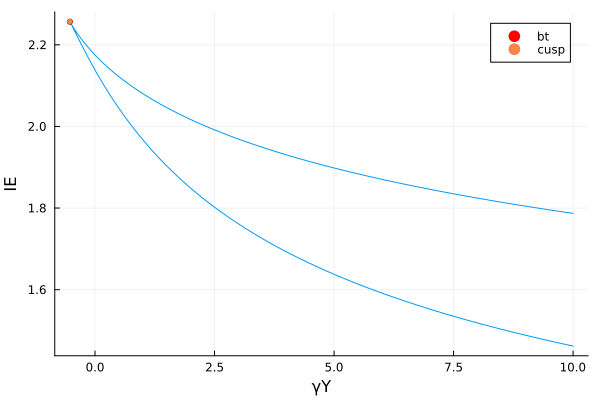

In [23]:
plot(hp_codim2_2)